In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen(num_train=1000,num_feature=5):
    gen_graph =  tf.Graph()
    with gen_graph.as_default():
        w = tf.random_normal([num_feature,1])
        b = tf.Variable(np.random.rand())
        x = tf.random_normal(shape=[num_train,num_feature])
        y = tf.matmul(x,w)+b
    with tf.Session(graph=gen_graph) as sess:
        sess.run(tf.global_variables_initializer())
        x,y,w,b =sess.run([x,y,w,b])
        return x,y,w,b

In [3]:
# X : matrix mxn
# w : matrix nx1
# y : matrix mx1
# b : scalar
def linreg(x,y,iterations=1000,lr=0.01):
    num_train = x.shape[0]
    num_feature = x.shape[1]
    losses = []
    w = tf.Variable(tf.zeros([num_feature,1]))
    b = tf.Variable(np.random.rand())
    x_t = tf.placeholder(tf.float32,shape=[None,num_feature])
    y_true = tf.placeholder(tf.float32,shape=[None,1])
    y_t = tf.matmul(x_t,w)+b
    loss = 0.5 * tf.reduce_mean(tf.square(y_t-y_true),0)
    update_w = w.assign(tf.subtract(w,tf.matmul(tf.transpose(x),(y_t-y))*(1.0/num_train)*lr))
    update_b = b.assign(tf.subtract(b,tf.reduce_mean(y_t-y_true)*lr))
    with tf.Session(graph=tf.get_default_graph()) as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(iterations):
            _loss,_w,_b,_x,_u,_b=sess.run([loss,w,b,x_t,update_w,update_b],feed_dict={x_t : x,y_true : y})
            losses.append(_loss)
            print(_loss)
    plt.plot(losses)
    plt.show()
    print('Prediction w ',_w)
    print('Prediction b ',_b)
    
        
        

[0.5091799]
[0.49917394]
[0.48936516]
[0.47974944]
[0.47032323]
[0.46108273]
[0.4520242]
[0.4431441]
[0.4344389]
[0.4259051]
[0.41753945]
[0.4093384]
[0.40129897]
[0.39341766]
[0.38569173]
[0.37811786]
[0.37069288]
[0.36341426]
[0.35627887]
[0.34928396]
[0.34242672]
[0.33570442]
[0.3291145]
[0.3226542]
[0.316321]
[0.31011236]
[0.30402613]
[0.2980594]
[0.29221013]
[0.286476]
[0.2808546]
[0.2753437]
[0.2699414]
[0.2646453]
[0.2594533]
[0.25436345]
[0.24937369]
[0.24448203]
[0.23968661]
[0.2349855]
[0.23037674]
[0.22585867]
[0.22142944]
[0.21708725]
[0.21283042]
[0.2086573]
[0.20456617]
[0.2005554]
[0.19662353]
[0.19276893]
[0.18899009]
[0.1852855]
[0.18165371]
[0.17809322]
[0.17460279]
[0.17118089]
[0.16782618]
[0.16453743]
[0.16131327]
[0.15815245]
[0.15505368]
[0.15201584]
[0.14903761]
[0.1461179]
[0.14325552]
[0.14044932]
[0.13769823]
[0.13500121]
[0.13235709]
[0.12976491]
[0.1272236]
[0.12473223]
[0.12228974]
[0.11989519]
[0.11754762]
[0.11524612]
[0.11298986]
[0.11077783]
[0.1086092

[3.1326925e-07]
[3.0727435e-07]
[3.0141666e-07]
[2.9566795e-07]
[2.9004033e-07]
[2.845069e-07]
[2.7909306e-07]
[2.7376882e-07]
[2.6855116e-07]
[2.6343466e-07]
[2.584137e-07]
[2.5350303e-07]
[2.4864426e-07]
[2.4387188e-07]
[2.3921294e-07]
[2.3462857e-07]
[2.3013575e-07]
[2.2573877e-07]
[2.2142447e-07]
[2.1720581e-07]
[2.1306191e-07]
[2.0899925e-07]
[2.0502942e-07]
[2.0109987e-07]
[1.9724682e-07]
[1.9348532e-07]
[1.8978955e-07]
[1.8617038e-07]
[1.8262814e-07]
[1.7913419e-07]
[1.7570063e-07]
[1.7235256e-07]
[1.690678e-07]
[1.6585247e-07]
[1.6268383e-07]
[1.5957497e-07]
[1.5653258e-07]
[1.5354834e-07]
[1.5060907e-07]
[1.4773424e-07]
[1.4491464e-07]
[1.4216796e-07]
[1.39447e-07]
[1.3678354e-07]
[1.341776e-07]
[1.3160883e-07]
[1.2909969e-07]
[1.2663729e-07]
[1.2421678e-07]
[1.218453e-07]
[1.1952805e-07]
[1.172331e-07]
[1.1500165e-07]
[1.12813765e-07]
[1.1065606e-07]
[1.0854118e-07]
[1.0647927e-07]
[1.0444489e-07]
[1.02456276e-07]
[1.00491846e-07]
[9.85753e-08]
[9.6703126e-08]
[9.4857896e-08]

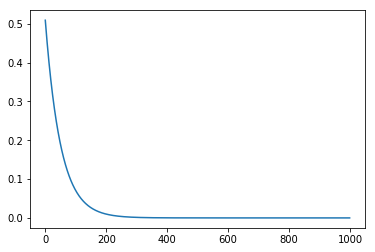

Prediction w  [[ 0.30646878]
 [ 0.20416233]
 [-0.24157721]
 [-0.33675998]
 [ 0.8226915 ]]
Prediction b  0.6366793
Real w values  [[ 0.3064756 ]
 [ 0.20417799]
 [-0.24157509]
 [-0.33677527]
 [ 0.82274306]]
Real b values  0.6366544


In [4]:
x,y,w,b=gen()
linreg(x,y)
print('Real w values ',w)
print('Real b values ',b)